In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df  = pd.read_csv('all_penguins_clean.csv')
df.dropna(inplace=True)

In [20]:
# Separate df into features with numerical descriptions and categories
penguins_data = df.select_dtypes(np.number)
penguins_info = df.select_dtypes(exclude = "float")
penguins_data.drop(columns='Sample Number')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [21]:
#We have to scale the data for PCA  - diff units can make it seem like one variable contributes more to variance than others- standardised scaling means you can compare the variance better


In [22]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X=scaler.fit_transform(penguins_data)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) #how many components to return afrer the transformation, default is all
penguins_pca = pca.fit_transform(X)

In [24]:
penguins_pca.shape

(334, 4)

In [25]:
pca.explained_variance_ratio_

array([0.55059715, 0.22294687, 0.14024339, 0.06586133])

([<matplotlib.axis.XTick at 0x1a25c27a50>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

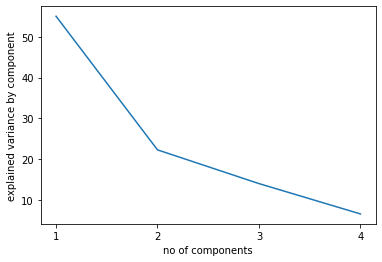

In [26]:
plt.plot(pca.explained_variance_ratio_*100)
plt.xlabel('no of components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(4), np.arange(1,5))

#PCA1 is at x=0 

(0.0, 100.0)

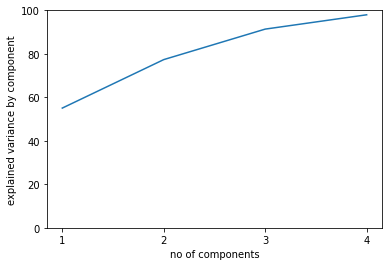

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('no of components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(4), np.arange(1,5))
plt.ylim(0,100)

In [ ]:
pca_df = pd.DataFrame